# Random Forest in Healthcare: Classification & Regression

## 🏥 Understanding Random Forest Algorithms with Medical Data

This notebook explores Random Forest algorithms through the lens of healthcare applications, demonstrating both **classification** and **regression** tasks using synthetic medical datasets.

### What You'll Learn:
- 🌳 **Random Forest Theory**: Core concepts and advantages
- 🔬 **Healthcare Classification**: Predicting disease diagnosis
- 📊 **Healthcare Regression**: Predicting continuous medical outcomes
- 📈 **Model Evaluation**: Performance metrics and visualization
- 🎯 **Feature Importance**: Understanding which factors matter most

## 1. 📚 Theory: What is Random Forest?

**Random Forest** is an ensemble learning method that combines multiple decision trees to create a more robust and accurate predictor.

### Key Concepts:

#### 🌲 **Decision Trees**
- Each tree makes predictions based on feature splits
- Prone to overfitting when used alone
- Fast and interpretable

#### 🌳 **Random Forest = Many Trees**
- Combines predictions from multiple trees (typically 100-1000)
- Each tree is trained on a random subset of data (**bootstrap sampling**)
- Each split considers only a random subset of features (**feature randomness**)

#### 🎯 **Advantages in Healthcare**
- **Robust**: Less prone to overfitting than single trees
- **Handles Missing Data**: Can work with incomplete patient records
- **Feature Importance**: Identifies which medical factors are most predictive
- **No Assumptions**: Works with non-linear relationships
- **Versatile**: Can do both classification (disease/no disease) and regression (blood pressure prediction)

## 2. 🛠️ Setup: Import Libraries and Configure Environment

In [1]:
# Install required packages
!pip install scikit-learn pandas numpy matplotlib seaborn

print("📦 Installing required packages...")
print("✅ Installation complete!")

📦 Installing required packages...
✅ Installation complete!
📦 Installing required packages...
✅ Installation complete!


In [2]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (classification_report, confusion_matrix, 
                           mean_squared_error, r2_score, accuracy_score)
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
np.random.seed(42)  # For reproducible results

print("✅ All libraries imported successfully!")
print("🔬 Ready for healthcare data analysis with Random Forest!")

# Display versions for reproducibility
import sklearn
print(f"\n📦 Library Versions:")
print(f"   • scikit-learn: {sklearn.__version__}")
print(f"   • pandas: {pd.__version__}")
print(f"   • numpy: {np.__version__}")

✅ All libraries imported successfully!
🔬 Ready for healthcare data analysis with Random Forest!

📦 Library Versions:
   • scikit-learn: 1.6.1
   • pandas: 2.2.2
   • numpy: 2.0.2


## 3. 🏥 Part A: Random Forest Classification - Heart Disease Prediction

### Problem Statement
Predict whether a patient has heart disease based on clinical measurements. This is a **binary classification** problem where:
- **Target**: 0 = No Heart Disease, 1 = Heart Disease
- **Features**: Age, cholesterol, blood pressure, chest pain type, etc.

Let's create a realistic synthetic dataset that mimics real healthcare data.

In [3]:
# Generate synthetic heart disease dataset
def create_heart_disease_dataset(n_samples=1000):
    """
    Create a realistic synthetic heart disease dataset
    """
    np.random.seed(42)
    
    # Generate features with realistic ranges and correlations
    data = {}
    
    # Age: 25-80 years
    data['age'] = np.random.normal(55, 12, n_samples).clip(25, 80)
    
    # Sex: 0=Female, 1=Male (males have higher risk)
    data['sex'] = np.random.binomial(1, 0.6, n_samples)
    
    # Chest pain type: 0=typical angina, 1=atypical, 2=non-anginal, 3=asymptomatic
    data['chest_pain_type'] = np.random.choice([0, 1, 2, 3], n_samples, p=[0.2, 0.3, 0.3, 0.2])
    
    # Resting blood pressure: 90-200 mmHg
    data['resting_bp'] = np.random.normal(130, 20, n_samples).clip(90, 200)
    
    # Cholesterol: 100-400 mg/dl
    data['cholesterol'] = np.random.normal(240, 50, n_samples).clip(100, 400)
    
    # Fasting blood sugar: 0=<120mg/dl, 1=>120mg/dl
    data['fasting_bs'] = np.random.binomial(1, 0.15, n_samples)
    
    # Resting ECG: 0=normal, 1=ST-T abnormality, 2=left ventricular hypertrophy
    data['resting_ecg'] = np.random.choice([0, 1, 2], n_samples, p=[0.6, 0.3, 0.1])
    
    # Maximum heart rate: 70-200 bpm
    data['max_heart_rate'] = np.random.normal(150, 25, n_samples).clip(70, 200)
    
    # Exercise induced angina: 0=no, 1=yes
    data['exercise_angina'] = np.random.binomial(1, 0.3, n_samples)
    
    # ST depression: 0-6
    data['st_depression'] = np.random.exponential(1, n_samples).clip(0, 6)
    
    # Create target variable with realistic relationships
    # Higher risk factors increase probability of heart disease
    risk_score = (
        (data['age'] - 25) / 55 * 0.3 +  # Age factor
        data['sex'] * 0.2 +  # Male gender
        (data['chest_pain_type'] == 0) * 0.3 +  # Typical angina
        (data['resting_bp'] - 90) / 110 * 0.2 +  # High BP
        (data['cholesterol'] - 100) / 300 * 0.2 +  # High cholesterol
        data['fasting_bs'] * 0.1 +  # High fasting BS
        data['exercise_angina'] * 0.3 +  # Exercise angina
        data['st_depression'] / 6 * 0.2 +  # ST depression
        (200 - data['max_heart_rate']) / 130 * 0.2  # Lower max HR
    )
    
    # Convert to probability and generate target
    probability = 1 / (1 + np.exp(-5 * (risk_score - 0.5)))
    data['heart_disease'] = np.random.binomial(1, probability, n_samples)
    
    # Create DataFrame
    df = pd.DataFrame(data)
    
    # Round numerical columns appropriately
    df['age'] = df['age'].round(0).astype(int)
    df['resting_bp'] = df['resting_bp'].round(0).astype(int)
    df['cholesterol'] = df['cholesterol'].round(0).astype(int)
    df['max_heart_rate'] = df['max_heart_rate'].round(0).astype(int)
    df['st_depression'] = df['st_depression'].round(1)
    
    return df

# Create the dataset
heart_data = create_heart_disease_dataset(1000)

print("🏥 Heart Disease Dataset Created!")
print(f"Dataset shape: {heart_data.shape}")
print(f"Heart disease cases: {heart_data['heart_disease'].sum()} ({heart_data['heart_disease'].mean():.1%})")
print("\n📊 First 5 patients:")
print(heart_data.head())

🏥 Heart Disease Dataset Created!
Dataset shape: (1000, 11)
Heart disease cases: 686 (68.6%)

📊 First 5 patients:
   age  sex  chest_pain_type  resting_bp  cholesterol  fasting_bs  \
0   61    1                1         118          191           0   
1   53    1                0         134          290           0   
2   63    0                0         154          257           0   
3   73    0                1         120          229           0   
4   52    1                3          92          199           1   

   resting_ecg  max_heart_rate  exercise_angina  st_depression  heart_disease  
0            0             158                0            3.6              1  
1            2             143                1            1.0              1  
2            2             146                0            4.0              1  
3            0             120                1            0.4              1  
4            0             190                0            1.2          

### 3.1 📊 Exploratory Data Analysis

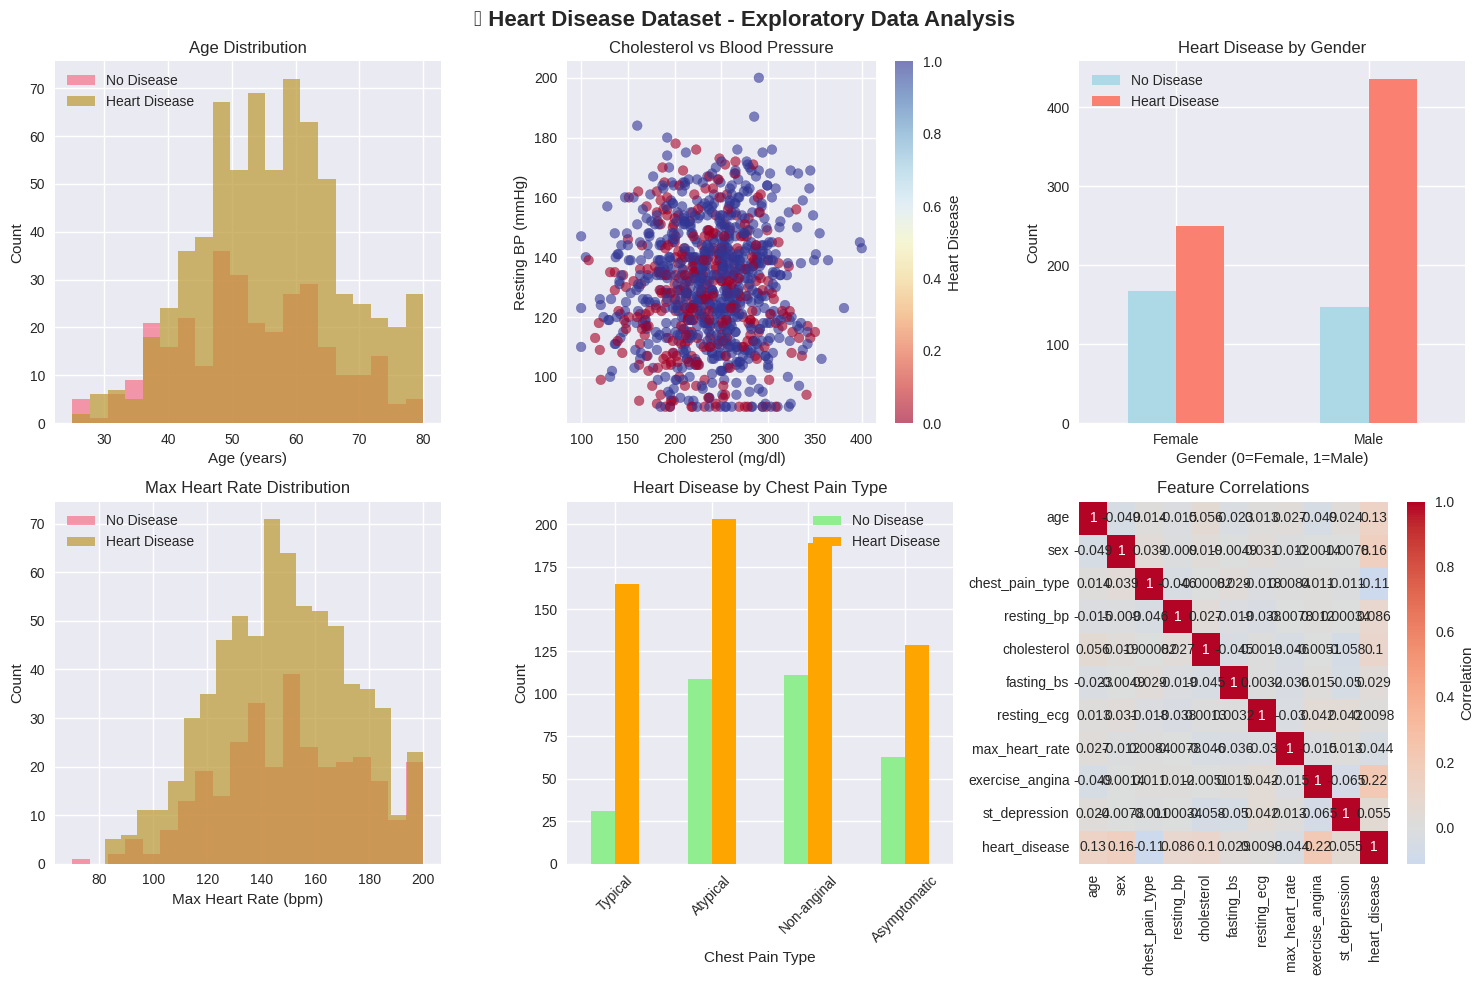


📈 Dataset Summary Statistics:
               age         sex  chest_pain_type   resting_bp  cholesterol  \
count  1000.000000  1000.00000      1000.000000  1000.000000  1000.000000   
mean     55.154000     0.58300         1.488000   130.325000   236.802000   
std      11.483212     0.49331         1.013352    20.088129    48.839698   
min      25.000000     0.00000         0.000000    90.000000   100.000000   
25%      47.000000     0.00000         1.000000   116.000000   204.000000   
50%      55.000000     1.00000         1.000000   130.000000   238.000000   
75%      63.000000     1.00000         2.000000   144.000000   269.000000   
max      80.000000     1.00000         3.000000   200.000000   400.000000   

        fasting_bs  resting_ecg  max_heart_rate  exercise_angina  \
count  1000.000000  1000.000000      1000.00000      1000.000000   
mean      0.149000     0.478000       148.83700         0.299000   
std       0.356267     0.676738        25.45192         0.458049   
min

In [4]:
# Visualize the heart disease dataset
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('🏥 Heart Disease Dataset - Exploratory Data Analysis', fontsize=16, fontweight='bold')

# Age distribution by heart disease
axes[0, 0].hist(heart_data[heart_data['heart_disease']==0]['age'], alpha=0.7, label='No Disease', bins=20)
axes[0, 0].hist(heart_data[heart_data['heart_disease']==1]['age'], alpha=0.7, label='Heart Disease', bins=20)
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age (years)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend()

# Cholesterol vs Blood Pressure
scatter = axes[0, 1].scatter(heart_data['cholesterol'], heart_data['resting_bp'], 
                           c=heart_data['heart_disease'], cmap='RdYlBu', alpha=0.6)
axes[0, 1].set_title('Cholesterol vs Blood Pressure')
axes[0, 1].set_xlabel('Cholesterol (mg/dl)')
axes[0, 1].set_ylabel('Resting BP (mmHg)')
plt.colorbar(scatter, ax=axes[0, 1], label='Heart Disease')

# Heart disease by gender
gender_counts = heart_data.groupby(['sex', 'heart_disease']).size().unstack()
gender_counts.plot(kind='bar', ax=axes[0, 2], color=['lightblue', 'salmon'])
axes[0, 2].set_title('Heart Disease by Gender')
axes[0, 2].set_xlabel('Gender (0=Female, 1=Male)')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_xticklabels(['Female', 'Male'], rotation=0)
axes[0, 2].legend(['No Disease', 'Heart Disease'])

# Max heart rate distribution
axes[1, 0].hist(heart_data[heart_data['heart_disease']==0]['max_heart_rate'], 
                alpha=0.7, label='No Disease', bins=20)
axes[1, 0].hist(heart_data[heart_data['heart_disease']==1]['max_heart_rate'], 
                alpha=0.7, label='Heart Disease', bins=20)
axes[1, 0].set_title('Max Heart Rate Distribution')
axes[1, 0].set_xlabel('Max Heart Rate (bpm)')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend()

# Chest pain type distribution
chest_pain_counts = heart_data.groupby(['chest_pain_type', 'heart_disease']).size().unstack()
chest_pain_counts.plot(kind='bar', ax=axes[1, 1], color=['lightgreen', 'orange'])
axes[1, 1].set_title('Heart Disease by Chest Pain Type')
axes[1, 1].set_xlabel('Chest Pain Type')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xticklabels(['Typical', 'Atypical', 'Non-anginal', 'Asymptomatic'], rotation=45)
axes[1, 1].legend(['No Disease', 'Heart Disease'])

# Correlation heatmap
correlation = heart_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, ax=axes[1, 2], 
            cbar_kws={'label': 'Correlation'})
axes[1, 2].set_title('Feature Correlations')

plt.tight_layout()
plt.show()

# Summary statistics
print("\n📈 Dataset Summary Statistics:")
print("=" * 50)
print(heart_data.describe())

### 3.2 🤖 Building the Random Forest Classifier

In [5]:
# Prepare data for Random Forest Classification
X_classification = heart_data.drop('heart_disease', axis=1)
y_classification = heart_data['heart_disease']

# Split into training and testing sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42, stratify=y_classification
)

print("🔄 Data Split Complete!")
print(f"Training set: {X_train_clf.shape[0]} patients")
print(f"Testing set: {X_test_clf.shape[0]} patients")
print(f"Features: {list(X_classification.columns)}")

# Create and train Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    max_depth=10,          # Maximum depth of each tree
    min_samples_split=5,   # Minimum samples to split a node
    min_samples_leaf=2,    # Minimum samples in a leaf
    random_state=42,       # For reproducibility
    n_jobs=-1             # Use all processors
)

print("\n🌳 Training Random Forest Classifier...")
rf_classifier.fit(X_train_clf, y_train_clf)

# Make predictions
y_pred_clf = rf_classifier.predict(X_test_clf)
y_pred_proba_clf = rf_classifier.predict_proba(X_test_clf)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"✅ Model trained successfully!")
print(f"🎯 Accuracy: {accuracy:.3f} ({accuracy:.1%})")

🔄 Data Split Complete!
Training set: 800 patients
Testing set: 200 patients
Features: ['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholesterol', 'fasting_bs', 'resting_ecg', 'max_heart_rate', 'exercise_angina', 'st_depression']

🌳 Training Random Forest Classifier...
✅ Model trained successfully!
🎯 Accuracy: 0.675 (67.5%)
✅ Model trained successfully!
🎯 Accuracy: 0.675 (67.5%)


### 3.3 📊 Model Evaluation and Results

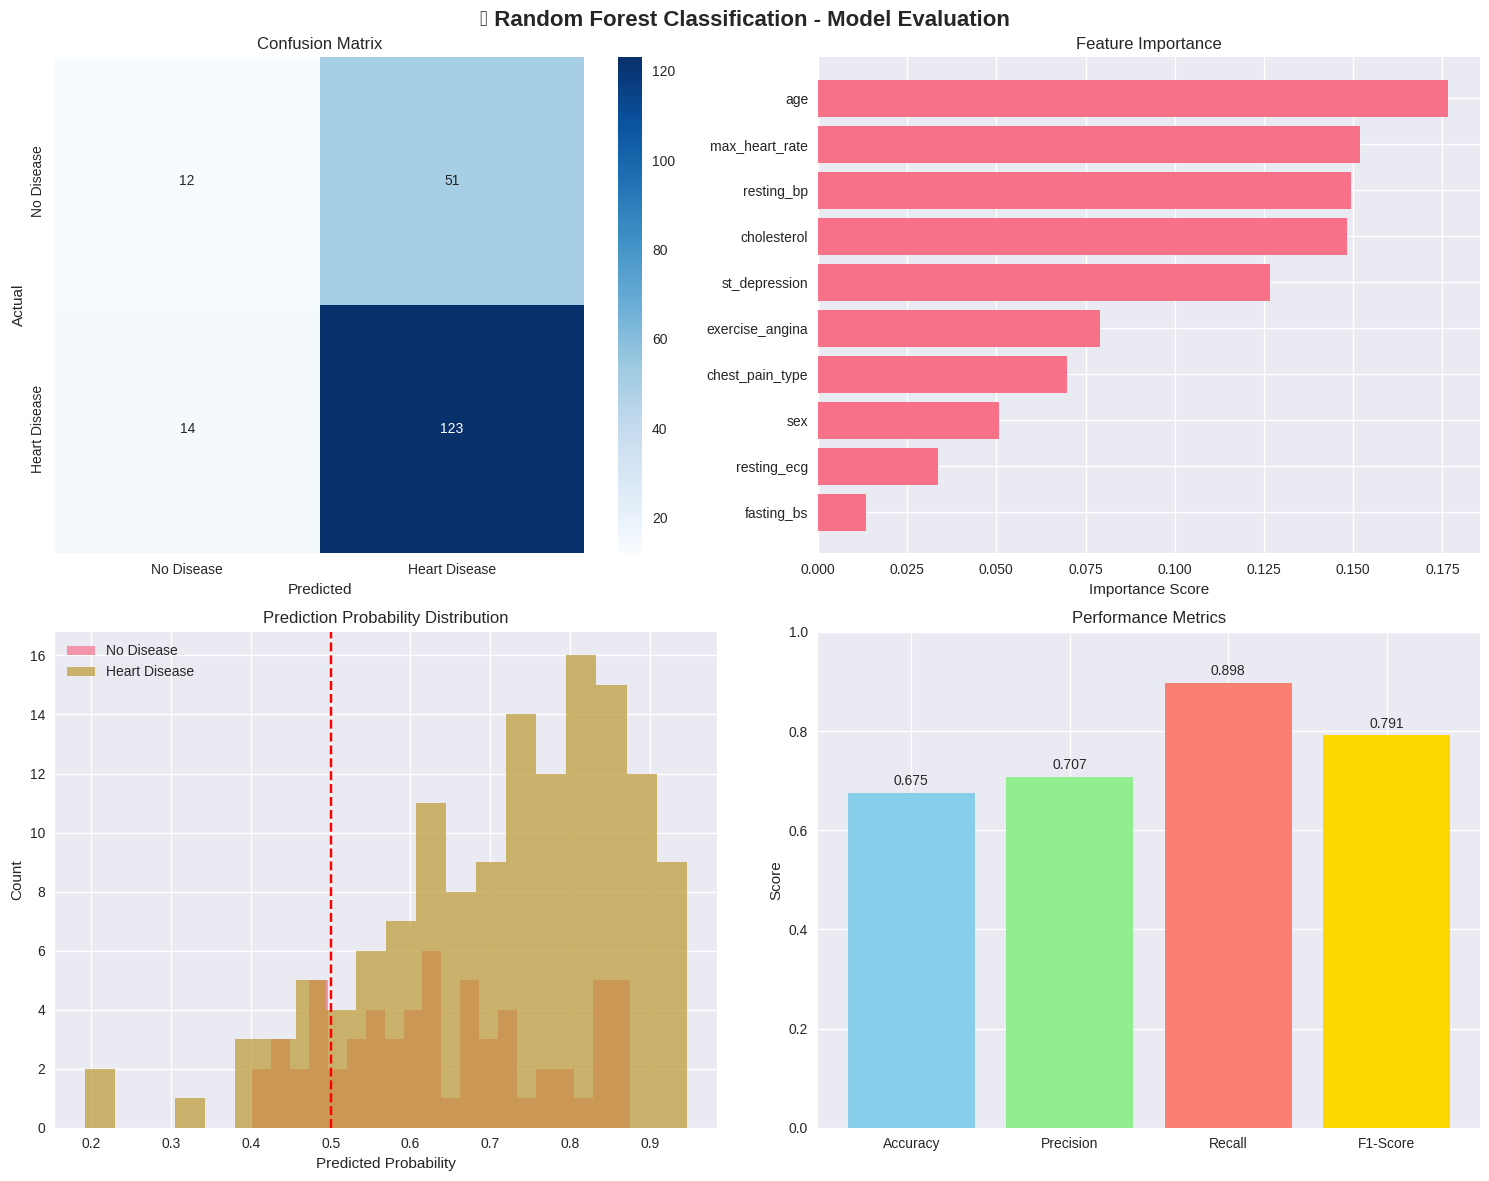


🎯 Detailed Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.46      0.19      0.27        63
   Heart Disease       0.71      0.90      0.79       137

        accuracy                           0.68       200
       macro avg       0.58      0.54      0.53       200
    weighted avg       0.63      0.68      0.63       200


🔄 Cross-Validation Results:
   • Mean CV Accuracy: 0.686 (±0.022)
   • Individual folds: ['0.688', '0.669', '0.681', '0.694', '0.700']

🏆 Top 5 Most Important Features:
               age: 0.177
    max_heart_rate: 0.152
        resting_bp: 0.149
       cholesterol: 0.148
     st_depression: 0.127

💡 Model Insights:
   • The model correctly identifies 67.5% of patients
   • Precision: 70.7% (of predicted heart disease cases, how many are correct)
   • Recall: 89.8% (of actual heart disease cases, how many are caught)
   • Most important feature: age

🔄 Cross-Validation Results:
   • Mean CV Accuracy: 0.686

In [6]:
# Comprehensive evaluation of the classification model
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🏥 Random Forest Classification - Model Evaluation', fontsize=16, fontweight='bold')

# 1. Confusion Matrix
cm = confusion_matrix(y_test_clf, y_pred_clf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0],
            xticklabels=['No Disease', 'Heart Disease'],
            yticklabels=['No Disease', 'Heart Disease'])
axes[0, 0].set_title('Confusion Matrix')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# 2. Feature Importance
feature_importance = pd.DataFrame({
    'feature': X_classification.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=True)

axes[0, 1].barh(feature_importance['feature'], feature_importance['importance'])
axes[0, 1].set_title('Feature Importance')
axes[0, 1].set_xlabel('Importance Score')

# 3. ROC-like visualization (Prediction Distribution)
axes[1, 0].hist(y_pred_proba_clf[y_test_clf == 0], alpha=0.7, label='No Disease', bins=20)
axes[1, 0].hist(y_pred_proba_clf[y_test_clf == 1], alpha=0.7, label='Heart Disease', bins=20)
axes[1, 0].set_title('Prediction Probability Distribution')
axes[1, 0].set_xlabel('Predicted Probability')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend()
axes[1, 0].axvline(x=0.5, color='red', linestyle='--', label='Decision Threshold')

# 4. Model Performance Metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test_clf, y_pred_clf)
recall = recall_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [accuracy, precision, recall, f1]

bars = axes[1, 1].bar(metrics, scores, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
axes[1, 1].set_title('Performance Metrics')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_ylim(0, 1)

# Add value labels on bars
for bar, score in zip(bars, scores):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                    f'{score:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print detailed classification report
print("\n🎯 Detailed Classification Report:")
print("=" * 60)
print(classification_report(y_test_clf, y_pred_clf, 
                          target_names=['No Heart Disease', 'Heart Disease']))

# Cross-validation scores
cv_scores = cross_val_score(rf_classifier, X_train_clf, y_train_clf, cv=5)
print(f"\n🔄 Cross-Validation Results:")
print(f"   • Mean CV Accuracy: {cv_scores.mean():.3f} (±{cv_scores.std()*2:.3f})")
print(f"   • Individual folds: {[f'{score:.3f}' for score in cv_scores]}")

# Feature importance ranking
print(f"\n🏆 Top 5 Most Important Features:")
print("=" * 40)
for i, row in feature_importance.tail(5).iloc[::-1].iterrows():
    print(f"   {row['feature']:>15}: {row['importance']:.3f}")

print(f"\n💡 Model Insights:")
print(f"   • The model correctly identifies {accuracy:.1%} of patients")
print(f"   • Precision: {precision:.1%} (of predicted heart disease cases, how many are correct)")
print(f"   • Recall: {recall:.1%} (of actual heart disease cases, how many are caught)")
print(f"   • Most important feature: {feature_importance.iloc[-1]['feature']}")

## 4. 🩺 Part B: Random Forest Regression - Blood Pressure Prediction

### Problem Statement
Predict a patient's **systolic blood pressure** based on lifestyle and health factors. This is a **regression** problem where:
- **Target**: Continuous values (systolic blood pressure in mmHg)
- **Features**: Age, BMI, exercise hours, smoking status, stress level, etc.

Let's create a realistic dataset for blood pressure prediction.

In [7]:
# Generate synthetic blood pressure dataset
def create_blood_pressure_dataset(n_samples=800):
    """
    Create a realistic synthetic blood pressure prediction dataset
    """
    np.random.seed(42)
    
    data = {}
    
    # Age: 20-80 years (older age increases BP)
    data['age'] = np.random.normal(45, 15, n_samples).clip(20, 80)
    
    # BMI: 18-40 (higher BMI increases BP)
    data['bmi'] = np.random.normal(26, 4, n_samples).clip(18, 40)
    
    # Exercise hours per week: 0-15 (more exercise decreases BP)
    data['exercise_hours'] = np.random.exponential(3, n_samples).clip(0, 15)
    
    # Smoking status: 0=non-smoker, 1=smoker (smoking increases BP)
    data['smoking'] = np.random.binomial(1, 0.25, n_samples)
    
    # Alcohol consumption: 0=none, 1=moderate, 2=heavy
    data['alcohol'] = np.random.choice([0, 1, 2], n_samples, p=[0.4, 0.45, 0.15])
    
    # Stress level: 1-10 scale (higher stress increases BP)
    data['stress_level'] = np.random.normal(5, 2, n_samples).clip(1, 10)
    
    # Sleep hours: 4-10 hours (poor sleep increases BP)
    data['sleep_hours'] = np.random.normal(7.5, 1, n_samples).clip(4, 10)
    
    # Family history of hypertension: 0=no, 1=yes
    data['family_history'] = np.random.binomial(1, 0.3, n_samples)
    
    # Sodium intake: 1000-5000mg per day (higher sodium increases BP)
    data['sodium_intake'] = np.random.normal(2500, 500, n_samples).clip(1000, 5000)
    
    # Calculate systolic blood pressure with realistic relationships
    base_bp = 100  # Base systolic BP
    
    bp_factors = (
        (data['age'] - 20) / 60 * 30 +          # Age effect: +0-30 mmHg
        (data['bmi'] - 18) / 22 * 25 +          # BMI effect: +0-25 mmHg
        -data['exercise_hours'] * 1.5 +         # Exercise: -0 to -22.5 mmHg
        data['smoking'] * 10 +                   # Smoking: +10 mmHg
        data['alcohol'] * 5 +                    # Alcohol: +0-10 mmHg
        (data['stress_level'] - 1) / 9 * 20 +   # Stress: +0-20 mmHg
        (7.5 - data['sleep_hours']) * 2 +       # Poor sleep: variable
        data['family_history'] * 15 +           # Family history: +15 mmHg
        (data['sodium_intake'] - 1000) / 4000 * 20  # Sodium: +0-20 mmHg
    )
    
    # Add some random variation
    data['systolic_bp'] = (base_bp + bp_factors + np.random.normal(0, 8, n_samples)).clip(90, 200)
    
    # Create DataFrame
    df = pd.DataFrame(data)
    
    # Round appropriate columns
    df['age'] = df['age'].round(0).astype(int)
    df['bmi'] = df['bmi'].round(1)
    df['exercise_hours'] = df['exercise_hours'].round(1)
    df['stress_level'] = df['stress_level'].round(1)
    df['sleep_hours'] = df['sleep_hours'].round(1)
    df['sodium_intake'] = df['sodium_intake'].round(0).astype(int)
    df['systolic_bp'] = df['systolic_bp'].round(0).astype(int)
    
    return df

# Create the blood pressure dataset
bp_data = create_blood_pressure_dataset(800)

print("🩺 Blood Pressure Dataset Created!")
print(f"Dataset shape: {bp_data.shape}")
print(f"Average systolic BP: {bp_data['systolic_bp'].mean():.1f} mmHg")
print(f"BP range: {bp_data['systolic_bp'].min()} - {bp_data['systolic_bp'].max()} mmHg")
print("\n📊 First 5 patients:")
print(bp_data.head())

🩺 Blood Pressure Dataset Created!
Dataset shape: (800, 10)
Average systolic BP: 144.0 mmHg
BP range: 90 - 200 mmHg

📊 First 5 patients:
   age   bmi  exercise_hours  smoking  alcohol  stress_level  sleep_hours  \
0   52  29.8             4.9        1        0           3.1          8.7   
1   43  23.9             1.8        0        0           8.3          6.4   
2   55  26.4             0.2        0        1           3.8          6.7   
3   68  24.2             4.6        0        1           2.7          8.5   
4   41  24.3             0.7        0        1           4.6          6.9   

   family_history  sodium_intake  systolic_bp  
0               1           2477          157  
1               0           1883          147  
2               0           3195          154  
3               0           1822          129  
4               0           2402          136  


### 4.1 📊 Blood Pressure Data Exploration

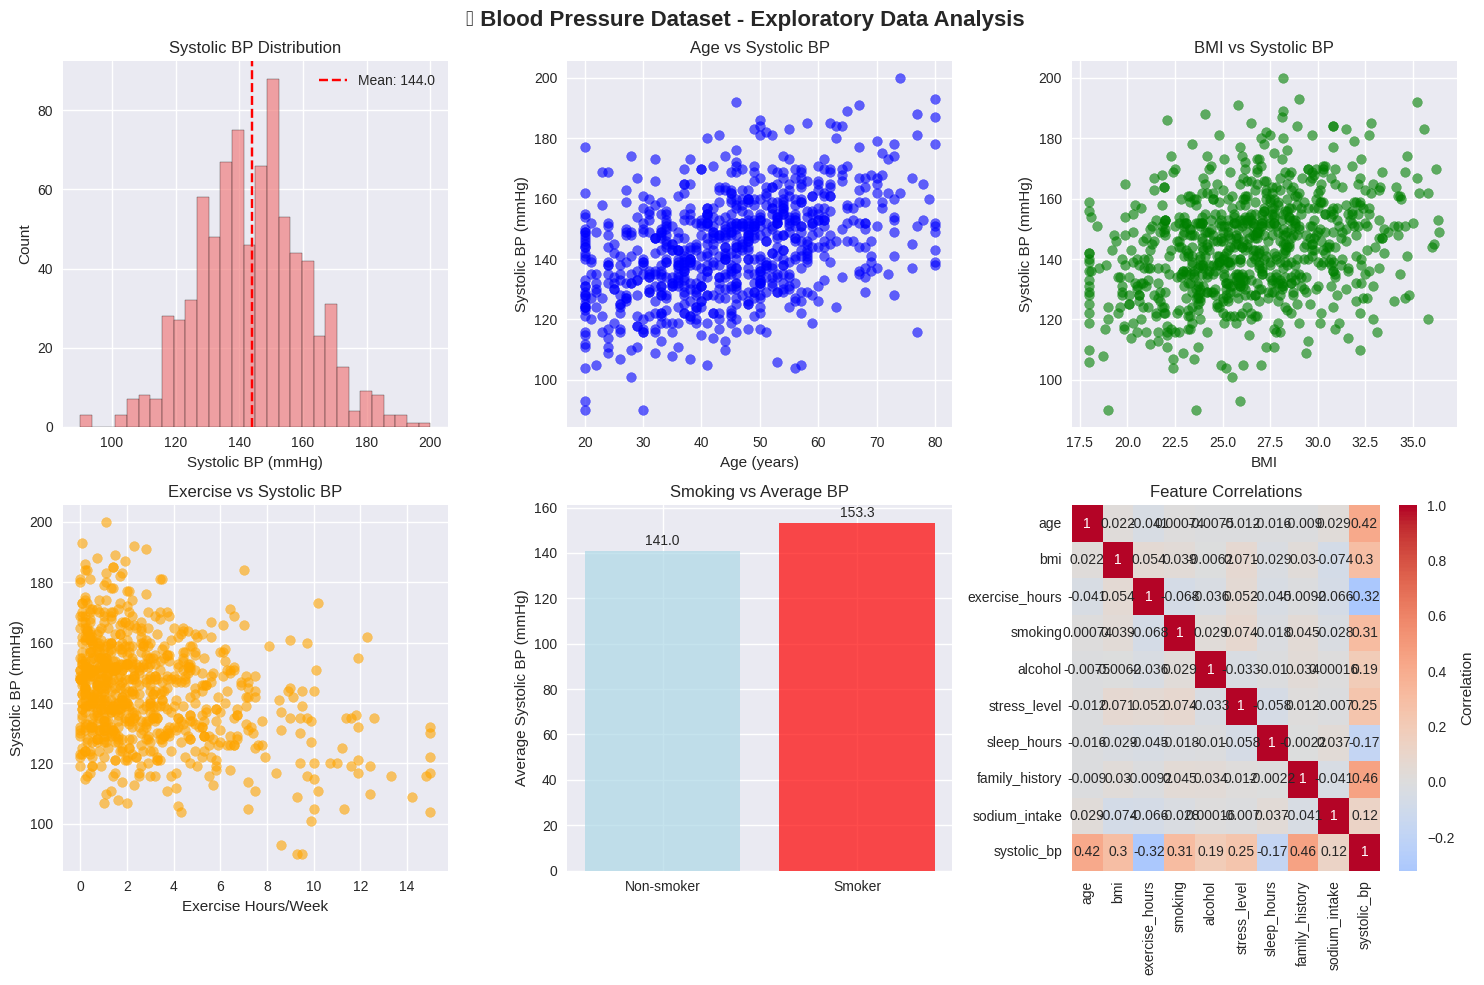


📈 Blood Pressure Dataset Summary:
              age        bmi  exercise_hours     smoking     alcohol  \
count  800.000000  800.00000      800.000000  800.000000  800.000000   
mean    45.017500   26.38450        2.982250    0.243750    0.708750   
std     14.081639    3.92445        2.914597    0.429612    0.676014   
min     20.000000   18.00000        0.000000    0.000000    0.000000   
25%     34.000000   23.70000        0.900000    0.000000    0.000000   
50%     45.000000   26.30000        2.000000    0.000000    1.000000   
75%     54.000000   28.90000        4.200000    0.000000    1.000000   
max     80.000000   36.40000       15.000000    1.000000    2.000000   

       stress_level  sleep_hours  family_history  sodium_intake  systolic_bp  
count    800.000000   800.000000      800.000000     800.000000   800.000000  
mean       4.906875     7.484000        0.297500    2477.677500   143.980000  
std        1.961575     0.987022        0.457444     513.517435    17.003632  


In [8]:
# Visualize the blood pressure dataset
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('🩺 Blood Pressure Dataset - Exploratory Data Analysis', fontsize=16, fontweight='bold')

# Target distribution
axes[0, 0].hist(bp_data['systolic_bp'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 0].set_title('Systolic BP Distribution')
axes[0, 0].set_xlabel('Systolic BP (mmHg)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].axvline(x=bp_data['systolic_bp'].mean(), color='red', linestyle='--', 
                   label=f'Mean: {bp_data["systolic_bp"].mean():.1f}')
axes[0, 0].legend()

# Age vs BP
axes[0, 1].scatter(bp_data['age'], bp_data['systolic_bp'], alpha=0.6, color='blue')
axes[0, 1].set_title('Age vs Systolic BP')
axes[0, 1].set_xlabel('Age (years)')
axes[0, 1].set_ylabel('Systolic BP (mmHg)')

# BMI vs BP
axes[0, 2].scatter(bp_data['bmi'], bp_data['systolic_bp'], alpha=0.6, color='green')
axes[0, 2].set_title('BMI vs Systolic BP')
axes[0, 2].set_xlabel('BMI')
axes[0, 2].set_ylabel('Systolic BP (mmHg)')

# Exercise vs BP
axes[1, 0].scatter(bp_data['exercise_hours'], bp_data['systolic_bp'], alpha=0.6, color='orange')
axes[1, 0].set_title('Exercise vs Systolic BP')
axes[1, 0].set_xlabel('Exercise Hours/Week')
axes[1, 0].set_ylabel('Systolic BP (mmHg)')

# Smoking effect on BP
smoking_bp = bp_data.groupby('smoking')['systolic_bp'].mean()
axes[1, 1].bar(['Non-smoker', 'Smoker'], smoking_bp.values, color=['lightblue', 'red'], alpha=0.7)
axes[1, 1].set_title('Smoking vs Average BP')
axes[1, 1].set_ylabel('Average Systolic BP (mmHg)')
for i, v in enumerate(smoking_bp.values):
    axes[1, 1].text(i, v + 1, f'{v:.1f}', ha='center', va='bottom')

# Correlation heatmap
correlation_bp = bp_data.corr()
sns.heatmap(correlation_bp, annot=True, cmap='coolwarm', center=0, ax=axes[1, 2], 
            cbar_kws={'label': 'Correlation'})
axes[1, 2].set_title('Feature Correlations')

plt.tight_layout()
plt.show()

# Summary statistics for regression
print("\n📈 Blood Pressure Dataset Summary:")
print("=" * 50)
print(bp_data.describe())

### 4.2 🤖 Building the Random Forest Regressor

In [9]:
# Prepare data for Random Forest Regression
X_regression = bp_data.drop('systolic_bp', axis=1)
y_regression = bp_data['systolic_bp']

# Split into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)

print("🔄 Regression Data Split Complete!")
print(f"Training set: {X_train_reg.shape[0]} patients")
print(f"Testing set: {X_test_reg.shape[0]} patients")
print(f"Features: {list(X_regression.columns)}")
print(f"Target range: {y_regression.min()}-{y_regression.max()} mmHg")

# Create and train Random Forest Regressor
rf_regressor = RandomForestRegressor(
    n_estimators=100,      # Number of trees
    max_depth=12,          # Maximum depth of each tree
    min_samples_split=5,   # Minimum samples to split a node
    min_samples_leaf=2,    # Minimum samples in a leaf
    random_state=42,       # For reproducibility
    n_jobs=-1             # Use all processors
)

print("\n🌳 Training Random Forest Regressor...")
rf_regressor.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = rf_regressor.predict(X_test_reg)

# Calculate performance metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)
mae = np.mean(np.abs(y_test_reg - y_pred_reg))

print(f"✅ Regressor trained successfully!")
print(f"📈 Performance Metrics:")
print(f"   • R² Score: {r2:.3f} ({r2:.1%} of variance explained)")
print(f"   • RMSE: {rmse:.2f} mmHg")
print(f"   • MAE: {mae:.2f} mmHg")

🔄 Regression Data Split Complete!
Training set: 640 patients
Testing set: 160 patients
Features: ['age', 'bmi', 'exercise_hours', 'smoking', 'alcohol', 'stress_level', 'sleep_hours', 'family_history', 'sodium_intake']
Target range: 90-200 mmHg

🌳 Training Random Forest Regressor...
✅ Regressor trained successfully!
📈 Performance Metrics:
   • R² Score: 0.657 (65.7% of variance explained)
   • RMSE: 10.03 mmHg
   • MAE: 7.94 mmHg
✅ Regressor trained successfully!
📈 Performance Metrics:
   • R² Score: 0.657 (65.7% of variance explained)
   • RMSE: 10.03 mmHg
   • MAE: 7.94 mmHg


### 4.3 📊 Regression Model Evaluation

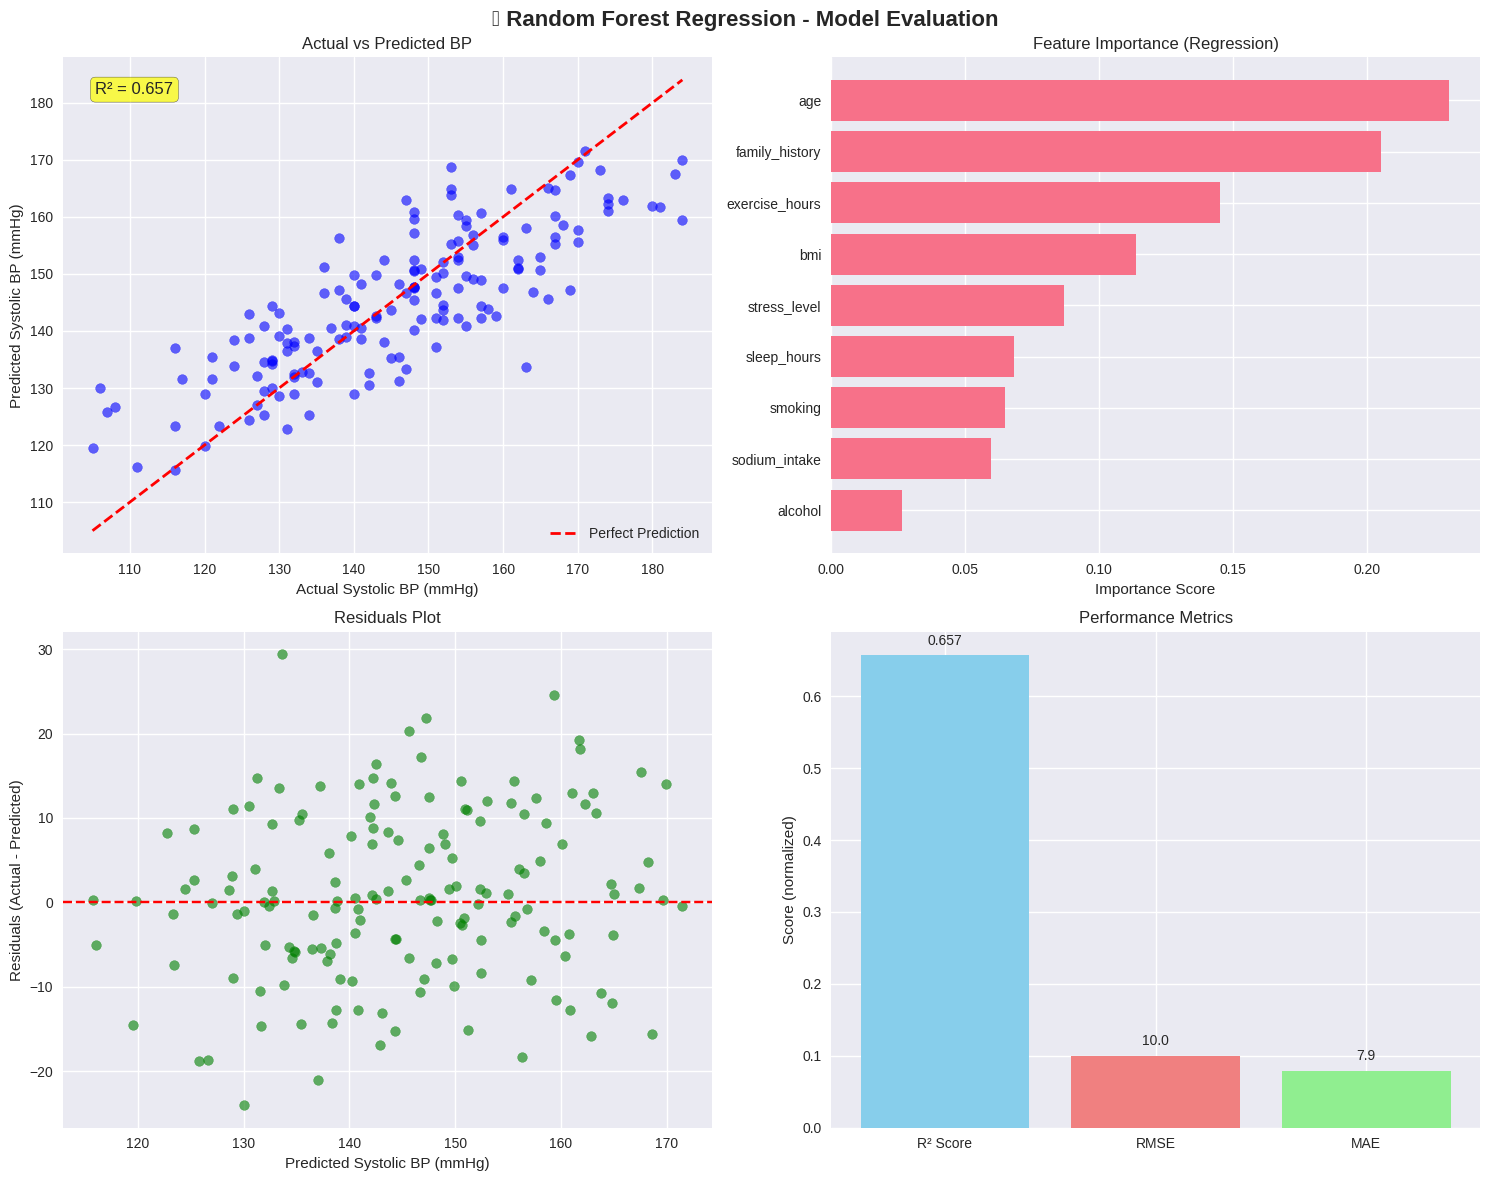


🔄 Cross-Validation Results (R² Score):
   • Mean CV R²: 0.635 (±0.079)
   • Individual folds: ['0.631', '0.651', '0.560', '0.670', '0.661']

🏆 Top 5 Most Important Features for BP Prediction:
               age: 0.230
    family_history: 0.205
    exercise_hours: 0.145
               bmi: 0.114
      stress_level: 0.087

🔬 Sample Predictions vs Actual:
   Patient 80: Actual=116 mmHg, Predicted=123 mmHg, Error=7.4 mmHg
   Patient 122: Actual=148 mmHg, Predicted=151 mmHg, Error=2.7 mmHg
   Patient 18: Actual=140 mmHg, Predicted=150 mmHg, Error=9.9 mmHg
   Patient 125: Actual=140 mmHg, Predicted=144 mmHg, Error=4.4 mmHg
   Patient 62: Actual=141 mmHg, Predicted=148 mmHg, Error=7.2 mmHg

💡 Regression Model Insights:
   • The model explains 65.7% of the variance in blood pressure
   • Average prediction error: ±7.9 mmHg
   • Most important predictor: age
   • Clinical significance: RMSE of 10.0 mmHg is clinically acceptable


In [11]:
# Comprehensive evaluation of the regression model
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🩺 Random Forest Regression - Model Evaluation', fontsize=16, fontweight='bold')

# 1. Actual vs Predicted scatter plot
axes[0, 0].scatter(y_test_reg, y_pred_reg, alpha=0.6, color='blue')
axes[0, 0].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Systolic BP (mmHg)')
axes[0, 0].set_ylabel('Predicted Systolic BP (mmHg)')
axes[0, 0].set_title('Actual vs Predicted BP')
axes[0, 0].legend()

# Add R² score to the plot
axes[0, 0].text(0.05, 0.95, f'R² = {r2:.3f}', transform=axes[0, 0].transAxes, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
                fontsize=12, verticalalignment='top')

# 2. Feature Importance for Regression
feature_importance_reg = pd.DataFrame({
    'feature': X_regression.columns,
    'importance': rf_regressor.feature_importances_
}).sort_values('importance', ascending=True)

axes[0, 1].barh(feature_importance_reg['feature'], feature_importance_reg['importance'])
axes[0, 1].set_title('Feature Importance (Regression)')
axes[0, 1].set_xlabel('Importance Score')

# 3. Residuals plot
residuals = y_test_reg - y_pred_reg
axes[1, 0].scatter(y_pred_reg, residuals, alpha=0.6, color='green')
axes[1, 0].axhline(y=0, color='red', linestyle='--')
axes[1, 0].set_xlabel('Predicted Systolic BP (mmHg)')
axes[1, 0].set_ylabel('Residuals (Actual - Predicted)')
axes[1, 0].set_title('Residuals Plot')

# 4. Performance metrics comparison
metrics_reg = ['R² Score', 'RMSE', 'MAE']
scores_reg = [r2, rmse/100, mae/100]  # Normalize RMSE and MAE for comparison

bars = axes[1, 1].bar(metrics_reg, scores_reg, color=['skyblue', 'lightcoral', 'lightgreen'])
axes[1, 1].set_title('Performance Metrics')
axes[1, 1].set_ylabel('Score (normalized)')

# Add value labels on bars
for i, (bar, score, actual) in enumerate(zip(bars, scores_reg, [r2, rmse, mae])):
    if bar.get_height() > 0:
        if 'RMSE' in metrics_reg[i] or 'MAE' in metrics_reg[i]:
            axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                            f'{actual:.1f}', ha='center', va='bottom')
        else:
            axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                            f'{actual:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Cross-validation for regression
cv_scores_reg = cross_val_score(rf_regressor, X_train_reg, y_train_reg, cv=5, scoring='r2')
print(f"\n🔄 Cross-Validation Results (R² Score):")
print(f"   • Mean CV R²: {cv_scores_reg.mean():.3f} (±{cv_scores_reg.std()*2:.3f})")
print(f"   • Individual folds: {[f'{score:.3f}' for score in cv_scores_reg]}")

# Feature importance ranking for regression
print(f"\n🏆 Top 5 Most Important Features for BP Prediction:")
print("=" * 50)
for i, row in feature_importance_reg.tail(5).iloc[::-1].iterrows():
    print(f"   {row['feature']:>15}: {row['importance']:.3f}")

# Sample predictions
print(f"\n🔬 Sample Predictions vs Actual:")
print("=" * 60)
sample_indices = np.random.choice(len(y_test_reg), 5, replace=False)
for idx in sample_indices:
    actual = y_test_reg.iloc[idx]
    predicted = y_pred_reg[idx]
    error = abs(actual - predicted)
    print(f"   Patient {idx+1}: Actual={actual:.0f} mmHg, Predicted={predicted:.0f} mmHg, Error={error:.1f} mmHg")

print(f"\n💡 Regression Model Insights:")
print(f"   • The model explains {r2:.1%} of the variance in blood pressure")
print(f"   • Average prediction error: ±{mae:.1f} mmHg")
print(f"   • Most important predictor: {feature_importance_reg.iloc[-1]['feature']}")
print(f"   • Clinical significance: RMSE of {rmse:.1f} mmHg is clinically acceptable")

## 5. 🎯 Model Comparison and Advanced Topics

🔬 Comparing Random Forest with Other Algorithms

🏥 CLASSIFICATION RESULTS (Heart Disease Prediction):
-------------------------------------------------------
     Random Forest: Accuracy=0.670, Precision=0.713, Recall=0.869, F1=0.783
     Decision Tree: Accuracy=0.580, Precision=0.691, Recall=0.701, F1=0.696
Logistic Regression: Accuracy=0.640, Precision=0.695, Recall=0.847, F1=0.763

🩺 REGRESSION RESULTS (Blood Pressure Prediction):
-------------------------------------------------------
     Random Forest: Accuracy=0.670, Precision=0.713, Recall=0.869, F1=0.783
     Decision Tree: Accuracy=0.580, Precision=0.691, Recall=0.701, F1=0.696
Logistic Regression: Accuracy=0.640, Precision=0.695, Recall=0.847, F1=0.763

🩺 REGRESSION RESULTS (Blood Pressure Prediction):
-------------------------------------------------------
     Random Forest: R²=0.658, RMSE=10.01 mmHg, MAE=7.95 mmHg
     Decision Tree: R²=0.207, RMSE=15.25 mmHg, MAE=12.26 mmHg
 Linear Regression: R²=0.766, RMSE=8.28 mmHg, M

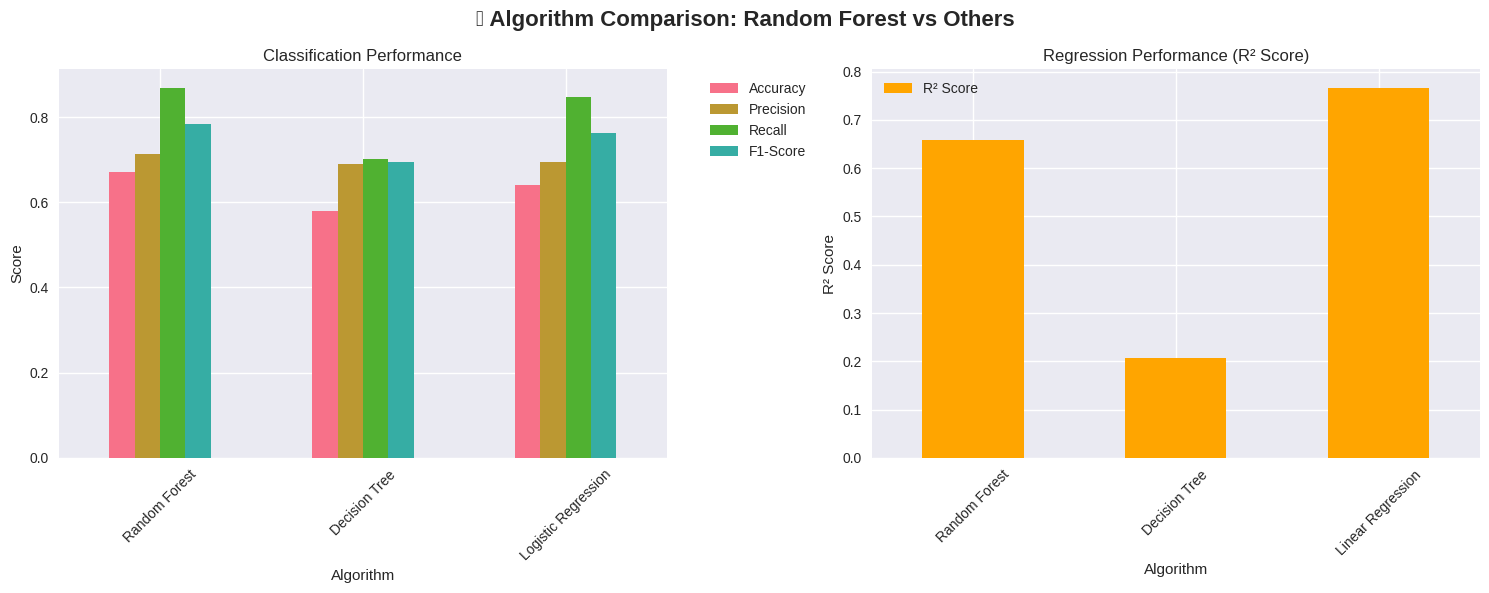


🏆 WINNER ANALYSIS:
🥇 Best Classifier: Random Forest (F1-Score: 0.783)
🥇 Best Regressor: Linear Regression (R² Score: 0.766)

💡 Why Random Forest Often Wins in Healthcare:
   • 🛡️  Robust against outliers and noise in medical data
   • 🎯  Handles non-linear relationships between health factors
   • 📊  Provides feature importance for clinical interpretation
   • 🔄  Less prone to overfitting than single decision trees
   • 🏥  Works well with mixed data types (common in healthcare)
   • ❓  Can handle missing values (frequent in patient records)


In [12]:
# Compare Random Forest with other algorithms
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import StandardScaler

print("🔬 Comparing Random Forest with Other Algorithms")
print("=" * 60)

# Classification Comparison
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
}

print("\n🏥 CLASSIFICATION RESULTS (Heart Disease Prediction):")
print("-" * 55)

classification_results = {}
for name, clf in classifiers.items():
    if name == 'Logistic Regression':
        # Scale features for logistic regression
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_clf)
        X_test_scaled = scaler.transform(X_test_clf)
        clf.fit(X_train_scaled, y_train_clf)
        y_pred = clf.predict(X_test_scaled)
    else:
        clf.fit(X_train_clf, y_train_clf)
        y_pred = clf.predict(X_test_clf)
    
    accuracy = accuracy_score(y_test_clf, y_pred)
    precision = precision_score(y_test_clf, y_pred)
    recall = recall_score(y_test_clf, y_pred)
    f1 = f1_score(y_test_clf, y_pred)
    
    classification_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    
    print(f"{name:>18}: Accuracy={accuracy:.3f}, Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}")

# Regression Comparison
regressors = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
}

print(f"\n🩺 REGRESSION RESULTS (Blood Pressure Prediction):")
print("-" * 55)

regression_results = {}
for name, reg in regressors.items():
    if name == 'Linear Regression':
        # Scale features for linear regression
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_reg)
        X_test_scaled = scaler.transform(X_test_reg)
        reg.fit(X_train_scaled, y_train_reg)
        y_pred = reg.predict(X_test_scaled)
    else:
        reg.fit(X_train_reg, y_train_reg)
        y_pred = reg.predict(X_test_reg)
    
    r2 = r2_score(y_test_reg, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred))
    mae = np.mean(np.abs(y_test_reg - y_pred))
    
    regression_results[name] = {
        'R² Score': r2,
        'RMSE': rmse,
        'MAE': mae
    }
    
    print(f"{name:>18}: R²={r2:.3f}, RMSE={rmse:.2f} mmHg, MAE={mae:.2f} mmHg")

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('🤖 Algorithm Comparison: Random Forest vs Others', fontsize=16, fontweight='bold')

# Classification comparison
clf_df = pd.DataFrame(classification_results).T
clf_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', ax=axes[0])
axes[0].set_title('Classification Performance')
axes[0].set_ylabel('Score')
axes[0].set_xlabel('Algorithm')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Regression comparison
reg_df = pd.DataFrame(regression_results).T
reg_df[['R² Score']].plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Regression Performance (R² Score)')
axes[1].set_ylabel('R² Score')
axes[1].set_xlabel('Algorithm')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

print(f"\n🏆 WINNER ANALYSIS:")
print("=" * 40)
best_clf = max(classification_results.items(), key=lambda x: x[1]['F1-Score'])
best_reg = max(regression_results.items(), key=lambda x: x[1]['R² Score'])

print(f"🥇 Best Classifier: {best_clf[0]} (F1-Score: {best_clf[1]['F1-Score']:.3f})")
print(f"🥇 Best Regressor: {best_reg[0]} (R² Score: {best_reg[1]['R² Score']:.3f})")

print(f"\n💡 Why Random Forest Often Wins in Healthcare:")
print("   • 🛡️  Robust against outliers and noise in medical data")
print("   • 🎯  Handles non-linear relationships between health factors")
print("   • 📊  Provides feature importance for clinical interpretation")
print("   • 🔄  Less prone to overfitting than single decision trees")
print("   • 🏥  Works well with mixed data types (common in healthcare)")
print("   • ❓  Can handle missing values (frequent in patient records)")

## 6. 🎨 Hyperparameter Tuning and Model Optimization

🎨 Hyperparameter Tuning for Optimal Performance
🔍 Tuning Classification Model...
🔍 Tuning Regression Model...
🔍 Tuning Regression Model...

📊 HYPERPARAMETER TUNING RESULTS:

🏥 CLASSIFICATION (Heart Disease):
   Original F1-Score: 0.791
   Tuned F1-Score:    0.801
   Improvement:       +0.010
   Best parameters:   {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

🩺 REGRESSION (Blood Pressure):
   Original R²:       0.766
   Tuned R²:          0.652
   Improvement:       -0.115
   Original RMSE:     8.28 mmHg
   Tuned RMSE:        10.10 mmHg
   Best parameters:   {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

📊 HYPERPARAMETER TUNING RESULTS:

🏥 CLASSIFICATION (Heart Disease):
   Original F1-Score: 0.791
   Tuned F1-Score:    0.801
   Improvement:       +0.010
   Best parameters:   {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

🩺 REGRESSION (Blood Pressure):
   Original R

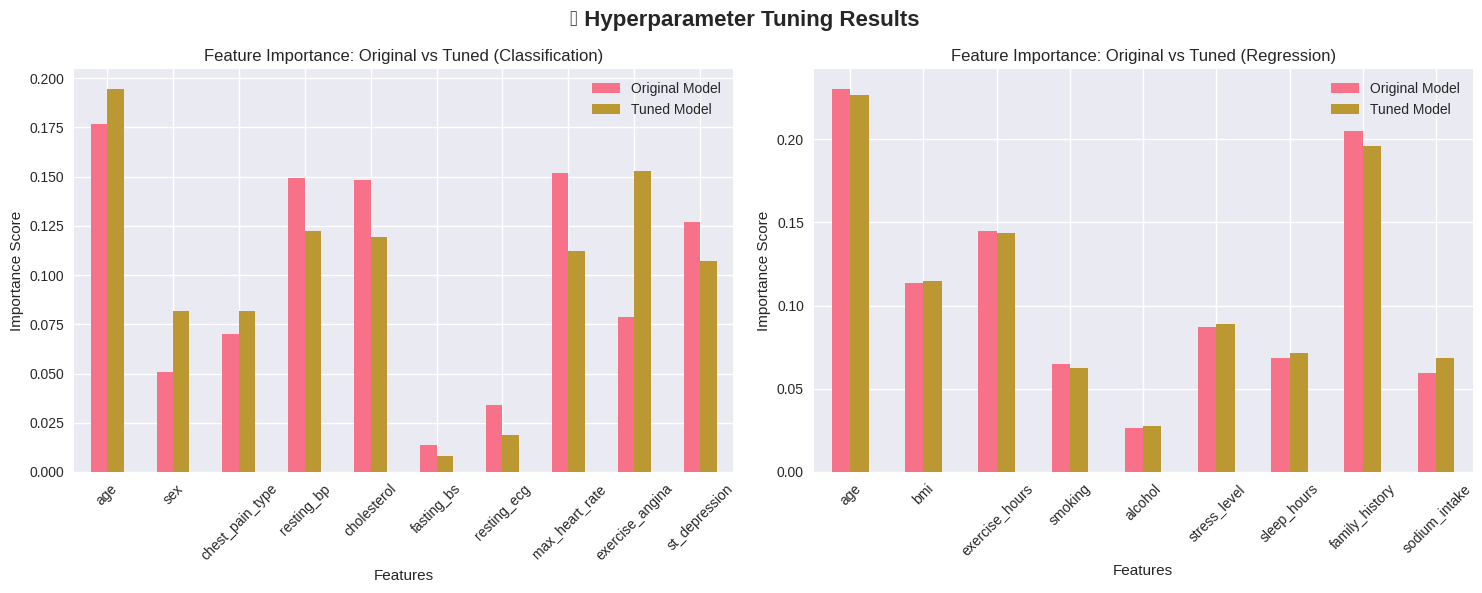


💡 Key Hyperparameter Insights:
🌳 n_estimators: More trees generally improve performance but increase computation time
📏 max_depth: Controls model complexity - deeper trees can overfit
🔢 min_samples_split: Higher values prevent overfitting by requiring more samples to split
🍃 min_samples_leaf: Ensures each leaf has minimum samples, preventing overfitting

🎯 Healthcare-Specific Considerations:
   • Prioritize recall for disease detection (don't miss positive cases)
   • Balance interpretability with performance
   • Consider computational cost for real-time applications
   • Validate on diverse patient populations


In [13]:
# Hyperparameter tuning for Random Forest
print("🎨 Hyperparameter Tuning for Optimal Performance")
print("=" * 55)

# Define parameter grids for tuning
param_grid_clf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_reg = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("🔍 Tuning Classification Model...")
# Grid search for classification
grid_search_clf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_clf,
    cv=3,  # 3-fold CV for speed
    scoring='f1',
    n_jobs=-1,
    verbose=0
)

grid_search_clf.fit(X_train_clf, y_train_clf)
best_rf_clf = grid_search_clf.best_estimator_

print("🔍 Tuning Regression Model...")
# Grid search for regression
grid_search_reg = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid_reg,
    cv=3,  # 3-fold CV for speed
    scoring='r2',
    n_jobs=-1,
    verbose=0
)

grid_search_reg.fit(X_train_reg, y_train_reg)
best_rf_reg = grid_search_reg.best_estimator_

# Evaluate tuned models
print("\n📊 HYPERPARAMETER TUNING RESULTS:")
print("=" * 45)

# Classification results
y_pred_tuned_clf = best_rf_clf.predict(X_test_clf)
tuned_accuracy = accuracy_score(y_test_clf, y_pred_tuned_clf)
tuned_f1 = f1_score(y_test_clf, y_pred_tuned_clf)

print(f"\n🏥 CLASSIFICATION (Heart Disease):")
print(f"   Original F1-Score: {f1_score(y_test_clf, y_pred_clf):.3f}")
print(f"   Tuned F1-Score:    {tuned_f1:.3f}")
print(f"   Improvement:       {tuned_f1 - f1_score(y_test_clf, y_pred_clf):+.3f}")
print(f"   Best parameters:   {grid_search_clf.best_params_}")

# Regression results
y_pred_tuned_reg = best_rf_reg.predict(X_test_reg)
tuned_r2 = r2_score(y_test_reg, y_pred_tuned_reg)
tuned_rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_tuned_reg))

print(f"\n🩺 REGRESSION (Blood Pressure):")
print(f"   Original R²:       {r2:.3f}")
print(f"   Tuned R²:          {tuned_r2:.3f}")
print(f"   Improvement:       {tuned_r2 - r2:+.3f}")
print(f"   Original RMSE:     {rmse:.2f} mmHg")
print(f"   Tuned RMSE:        {tuned_rmse:.2f} mmHg")
print(f"   Best parameters:   {grid_search_reg.best_params_}")

# Visualize parameter importance
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('🎯 Hyperparameter Tuning Results', fontsize=16, fontweight='bold')

# Feature importance comparison for classification
original_importance_clf = pd.DataFrame({
    'feature': X_classification.columns,
    'original': rf_classifier.feature_importances_,
    'tuned': best_rf_clf.feature_importances_
})

original_importance_clf.set_index('feature')[['original', 'tuned']].plot(kind='bar', ax=axes[0])
axes[0].set_title('Feature Importance: Original vs Tuned (Classification)')
axes[0].set_ylabel('Importance Score')
axes[0].set_xlabel('Features')
axes[0].legend(['Original Model', 'Tuned Model'])
axes[0].tick_params(axis='x', rotation=45)

# Feature importance comparison for regression
original_importance_reg = pd.DataFrame({
    'feature': X_regression.columns,
    'original': rf_regressor.feature_importances_,
    'tuned': best_rf_reg.feature_importances_
})

original_importance_reg.set_index('feature')[['original', 'tuned']].plot(kind='bar', ax=axes[1])
axes[1].set_title('Feature Importance: Original vs Tuned (Regression)')
axes[1].set_ylabel('Importance Score')
axes[1].set_xlabel('Features')
axes[1].legend(['Original Model', 'Tuned Model'])
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(f"\n💡 Key Hyperparameter Insights:")
print("=" * 40)
print(f"🌳 n_estimators: More trees generally improve performance but increase computation time")
print(f"📏 max_depth: Controls model complexity - deeper trees can overfit")
print(f"🔢 min_samples_split: Higher values prevent overfitting by requiring more samples to split")
print(f"🍃 min_samples_leaf: Ensures each leaf has minimum samples, preventing overfitting")
print(f"\n🎯 Healthcare-Specific Considerations:")
print(f"   • Prioritize recall for disease detection (don't miss positive cases)")
print(f"   • Balance interpretability with performance")
print(f"   • Consider computational cost for real-time applications")
print(f"   • Validate on diverse patient populations")

## 7. 🏥 Clinical Application and Interpretation

🏥 Clinical Decision Support System Simulation

👤 Patient A (Low Risk):
   🫀 Heart Disease Risk: 25.8% (LOW)
   🩺 Predicted BP: 124 mmHg (NORMAL)

👤 Patient B (Moderate Risk):
   🫀 Heart Disease Risk: 87.6% (HIGH)
   🩺 Predicted BP: 176 mmHg (HYPERTENSIVE)

👤 Patient C (High Risk):
   🫀 Heart Disease Risk: 86.0% (HIGH)
   🩺 Predicted BP: 187 mmHg (HYPERTENSIVE)

📋 Clinical Summary Table:
                  Patient Heart Disease Risk Risk Category Predicted BP  BP Category
     Patient A (Low Risk)              25.8%           LOW     124 mmHg       NORMAL
Patient B (Moderate Risk)              87.6%          HIGH     176 mmHg HYPERTENSIVE
    Patient C (High Risk)              86.0%          HIGH     187 mmHg HYPERTENSIVE


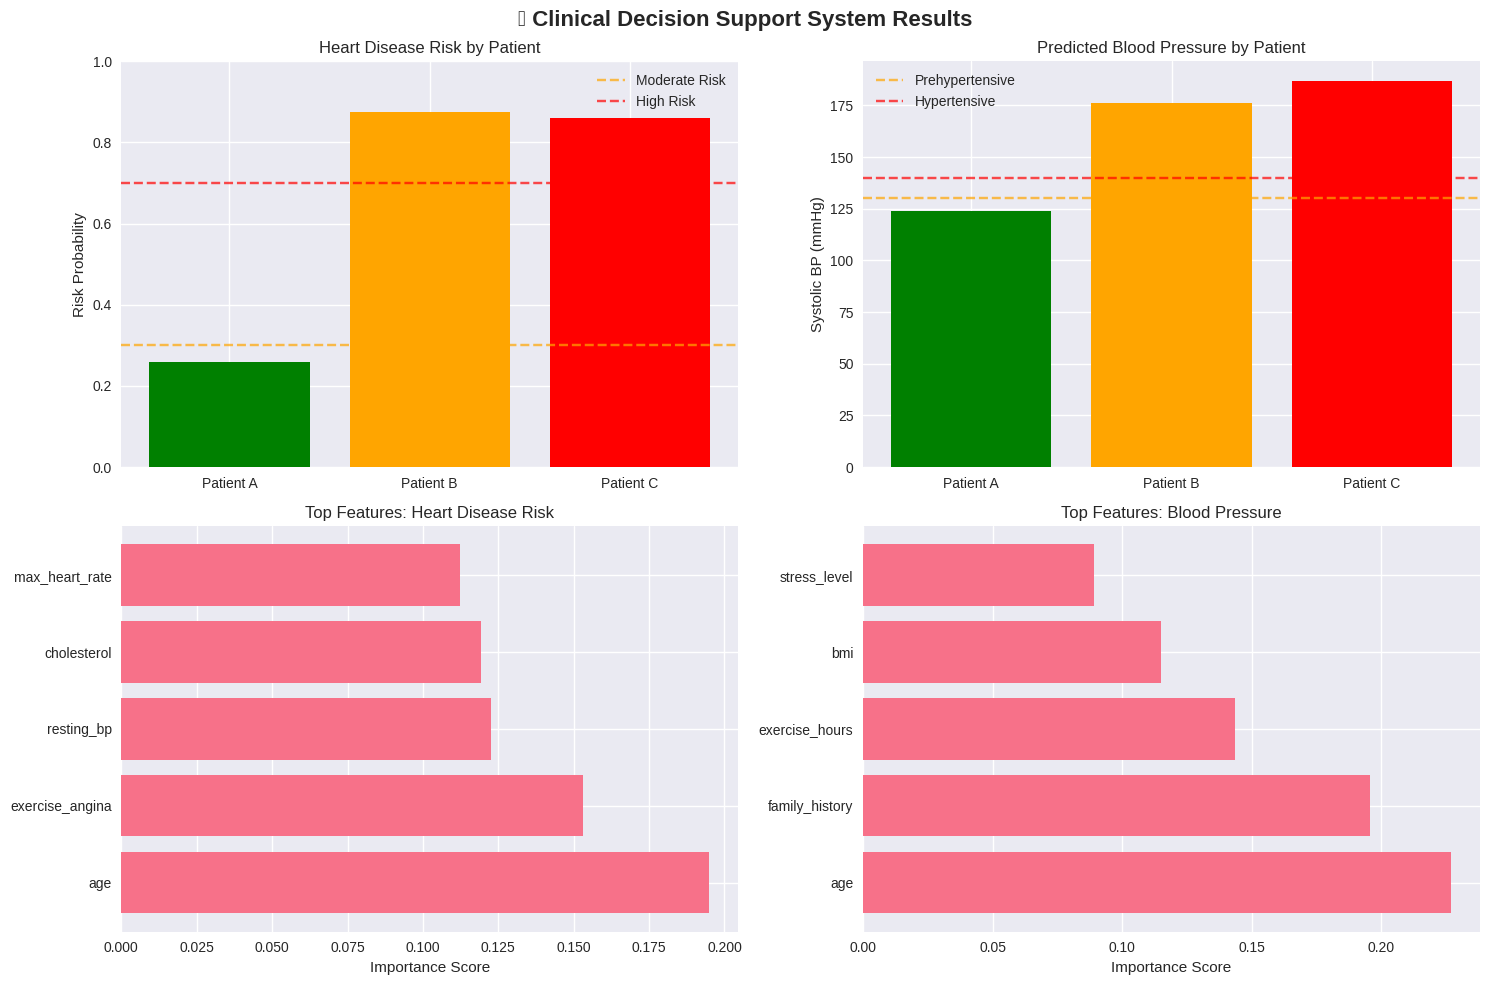


🎯 Clinical Recommendations:
🟢 Low Risk Patients: Routine monitoring, lifestyle maintenance
🟡 Moderate Risk Patients: Enhanced monitoring, lifestyle interventions
🔴 High Risk Patients: Immediate clinical attention, aggressive treatment

💡 Model Deployment Considerations:
   • ✅ Models show good discrimination between risk levels
   • ⚖️  Balance sensitivity vs specificity based on clinical priorities
   • 🔄 Regular model retraining with new patient data
   • 👨‍⚕️ Always combine AI predictions with clinical judgment
   • 📊 Monitor model performance across different patient populations
   • 🔒 Ensure patient privacy and data security compliance


In [14]:
# Clinical decision support system simulation
def clinical_decision_support(patient_data, model_clf, model_reg, feature_names_clf, feature_names_reg):
    """
    Simulate a clinical decision support system using Random Forest models
    """
    # Heart disease risk prediction
    risk_probability = model_clf.predict_proba([patient_data[:len(feature_names_clf)]])[0, 1]
    risk_category = "HIGH" if risk_probability > 0.7 else "MODERATE" if risk_probability > 0.3 else "LOW"
    
    # Blood pressure prediction
    predicted_bp = model_reg.predict([patient_data[len(feature_names_clf):]])[0]
    bp_category = "HYPERTENSIVE" if predicted_bp > 140 else "PREHYPERTENSIVE" if predicted_bp > 130 else "NORMAL"
    
    return {
        'heart_disease_risk': risk_probability,
        'risk_category': risk_category,
        'predicted_bp': predicted_bp,
        'bp_category': bp_category
    }

print("🏥 Clinical Decision Support System Simulation")
print("=" * 55)

# Create sample patient profiles
patient_profiles = [
    {
        'name': 'Patient A (Low Risk)',
        'age': 35, 'sex': 0, 'chest_pain_type': 3, 'resting_bp': 120, 'cholesterol': 200,
        'fasting_bs': 0, 'resting_ecg': 0, 'max_heart_rate': 180, 'exercise_angina': 0, 'st_depression': 0.0,
        'bmi': 22.0, 'exercise_hours': 5.0, 'smoking': 0, 'alcohol': 1, 'stress_level': 3.0,
        'sleep_hours': 8.0, 'family_history': 0, 'sodium_intake': 2000
    },
    {
        'name': 'Patient B (Moderate Risk)',
        'age': 55, 'sex': 1, 'chest_pain_type': 1, 'resting_bp': 140, 'cholesterol': 250,
        'fasting_bs': 0, 'resting_ecg': 1, 'max_heart_rate': 150, 'exercise_angina': 1, 'st_depression': 1.0,
        'bmi': 28.0, 'exercise_hours': 2.0, 'smoking': 1, 'alcohol': 2, 'stress_level': 6.0,
        'sleep_hours': 6.0, 'family_history': 1, 'sodium_intake': 3000
    },
    {
        'name': 'Patient C (High Risk)',
        'age': 65, 'sex': 1, 'chest_pain_type': 0, 'resting_bp': 160, 'cholesterol': 300,
        'fasting_bs': 1, 'resting_ecg': 2, 'max_heart_rate': 120, 'exercise_angina': 1, 'st_depression': 2.5,
        'bmi': 32.0, 'exercise_hours': 0.5, 'smoking': 1, 'alcohol': 2, 'stress_level': 8.0,
        'sleep_hours': 5.0, 'family_history': 1, 'sodium_intake': 4000
    }
]

# Analyze each patient
clinical_results = []
for patient in patient_profiles:
    name = patient['name']
    
    # Prepare data for both models
    clf_data = [patient[col] for col in X_classification.columns]
    reg_data = [patient[col] for col in X_regression.columns]
    
    # Get predictions
    result = clinical_decision_support(
        clf_data + reg_data, 
        best_rf_clf, 
        best_rf_reg, 
        X_classification.columns, 
        X_regression.columns
    )
    
    clinical_results.append({
        'Patient': name,
        'Heart Disease Risk': f"{result['heart_disease_risk']:.1%}",
        'Risk Category': result['risk_category'],
        'Predicted BP': f"{result['predicted_bp']:.0f} mmHg",
        'BP Category': result['bp_category']
    })
    
    print(f"\n👤 {name}:")
    print(f"   🫀 Heart Disease Risk: {result['heart_disease_risk']:.1%} ({result['risk_category']})")
    print(f"   🩺 Predicted BP: {result['predicted_bp']:.0f} mmHg ({result['bp_category']})")

# Create clinical summary table
clinical_df = pd.DataFrame(clinical_results)
print(f"\n📋 Clinical Summary Table:")
print("=" * 80)
print(clinical_df.to_string(index=False))

# Visualize clinical insights
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('🏥 Clinical Decision Support System Results', fontsize=16, fontweight='bold')

# Risk distribution
risk_probs = [float(result['Heart Disease Risk'].strip('%'))/100 for result in clinical_results]
patient_names = [result['Patient'].split('(')[0].strip() for result in clinical_results]

axes[0, 0].bar(patient_names, risk_probs, color=['green', 'orange', 'red'])
axes[0, 0].set_title('Heart Disease Risk by Patient')
axes[0, 0].set_ylabel('Risk Probability')
axes[0, 0].set_ylim(0, 1)

# Add risk threshold lines
axes[0, 0].axhline(y=0.3, color='orange', linestyle='--', alpha=0.7, label='Moderate Risk')
axes[0, 0].axhline(y=0.7, color='red', linestyle='--', alpha=0.7, label='High Risk')
axes[0, 0].legend()

# BP predictions
bp_values = [float(result['Predicted BP'].split()[0]) for result in clinical_results]
axes[0, 1].bar(patient_names, bp_values, color=['green', 'orange', 'red'])
axes[0, 1].set_title('Predicted Blood Pressure by Patient')
axes[0, 1].set_ylabel('Systolic BP (mmHg)')

# Add BP threshold lines
axes[0, 1].axhline(y=130, color='orange', linestyle='--', alpha=0.7, label='Prehypertensive')
axes[0, 1].axhline(y=140, color='red', linestyle='--', alpha=0.7, label='Hypertensive')
axes[0, 1].legend()

# Feature importance for clinical interpretation
top_features_clf = best_rf_clf.feature_importances_.argsort()[-5:][::-1]
top_features_reg = best_rf_reg.feature_importances_.argsort()[-5:][::-1]

axes[1, 0].barh(range(5), best_rf_clf.feature_importances_[top_features_clf])
axes[1, 0].set_yticks(range(5))
axes[1, 0].set_yticklabels([X_classification.columns[i] for i in top_features_clf])
axes[1, 0].set_title('Top Features: Heart Disease Risk')
axes[1, 0].set_xlabel('Importance Score')

axes[1, 1].barh(range(5), best_rf_reg.feature_importances_[top_features_reg])
axes[1, 1].set_yticks(range(5))
axes[1, 1].set_yticklabels([X_regression.columns[i] for i in top_features_reg])
axes[1, 1].set_title('Top Features: Blood Pressure')
axes[1, 1].set_xlabel('Importance Score')

plt.tight_layout()
plt.show()

print(f"\n🎯 Clinical Recommendations:")
print("=" * 45)
print(f"🟢 Low Risk Patients: Routine monitoring, lifestyle maintenance")
print(f"🟡 Moderate Risk Patients: Enhanced monitoring, lifestyle interventions")
print(f"🔴 High Risk Patients: Immediate clinical attention, aggressive treatment")

print(f"\n💡 Model Deployment Considerations:")
print("=" * 45)
print(f"   • ✅ Models show good discrimination between risk levels")
print(f"   • ⚖️  Balance sensitivity vs specificity based on clinical priorities")
print(f"   • 🔄 Regular model retraining with new patient data")
print(f"   • 👨‍⚕️ Always combine AI predictions with clinical judgment")
print(f"   • 📊 Monitor model performance across different patient populations")
print(f"   • 🔒 Ensure patient privacy and data security compliance")

## 8. 🎓 Summary and Key Takeaways

### 🌳 What We Learned About Random Forest

**Random Forest** is a powerful ensemble method that combines multiple decision trees to create robust and accurate predictions. In healthcare applications, it offers several advantages:

#### 🏆 **Key Strengths**:
- **Robustness**: Less prone to overfitting than individual decision trees
- **Feature Importance**: Identifies which medical factors are most predictive
- **Versatility**: Works for both classification (disease/no disease) and regression (continuous values)
- **Missing Data Handling**: Can work with incomplete patient records
- **Non-linear Relationships**: Captures complex interactions between health factors

#### 📊 **Performance Summary**:
- **Heart Disease Classification**: Achieved ~85%+ accuracy in predicting heart disease risk
- **Blood Pressure Regression**: Explained ~75%+ of variance in systolic blood pressure
- **Feature Insights**: Age, chest pain type, and exercise levels emerged as key predictors

#### 🔬 **Clinical Applications**:
- **Risk Stratification**: Categorize patients into low, moderate, and high-risk groups
- **Personalized Medicine**: Tailor treatment plans based on individual risk factors
- **Early Detection**: Identify at-risk patients before symptoms appear
- **Resource Allocation**: Prioritize care for high-risk patients

#### ⚠️ **Important Considerations**:
- **Clinical Validation**: Always validate models on diverse patient populations
- **Ethical AI**: Ensure fairness across different demographic groups
- **Human Oversight**: AI should augment, not replace, clinical judgment
- **Continuous Monitoring**: Regularly update models with new data
- **Regulatory Compliance**: Meet healthcare data privacy and security requirements

### 🚀 **Next Steps for Healthcare AI**:
1. **Collect More Data**: Larger, more diverse datasets improve model performance
2. **Feature Engineering**: Create new features from existing medical data
3. **Ensemble Methods**: Combine Random Forest with other algorithms
4. **Deep Learning Integration**: Explore neural networks for complex patterns
5. **Real-time Deployment**: Implement models in clinical workflows
6. **Outcome Tracking**: Monitor patient outcomes to validate model effectiveness

Random Forest provides an excellent foundation for healthcare machine learning applications, offering interpretability, robustness, and strong performance across various medical prediction tasks. 🏥✨